# Lung Cancer Prediction

## Objectives

Using logistic regression is to develop a model that can accurately predict whether an individual is likely to have lung cancer based on their gender, age, smoking status, and other relevant features. The project aims to improve early detection, assess risk factors, build a predictive model using logistic regression, evaluate its performance, and provide insights and recommendations for identifying individuals at higher risk of lung cancer.

## Importing the libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data as a Pandas DataFrame and displaying the first 5 rows

In [52]:
lung_cancer = pd.read_csv("survey lung cancer.csv")
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Cheaking the number of rows and columns

In [54]:
lung_cancer.shape

(309, 16)

## Displays a concise summary of the dataframe

In [55]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## Display the missing values in the DataFrame.

In [4]:
lung_cancer.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


There is no missing vlues in the dataset

## Cheaking the duplicate values 

In [5]:
lung_cancer.duplicated().sum()

33

There are 33 duplicate values

In [57]:
lung_cancer.drop_duplicates(inplace=True)

In [58]:
lung_cancer.shape

(276, 16)

## Describing the dataset

In [59]:
lung_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Data visualization

C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


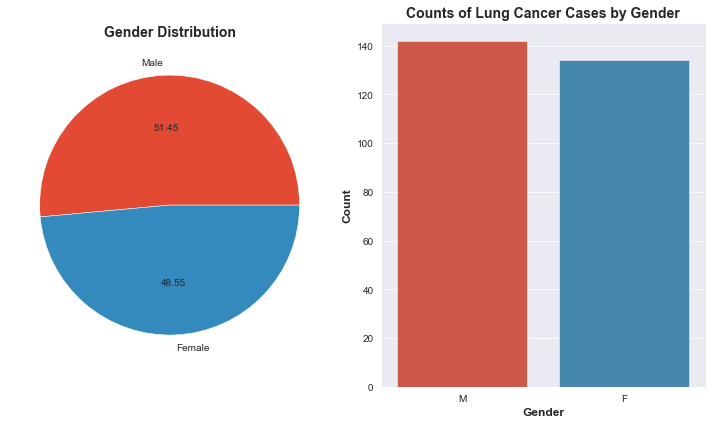

In [61]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.pie(lung_cancer['GENDER'].value_counts(), labels=['Male', 'Female'], autopct="%0.2f")
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

plt.subplot(122)
sns.countplot('GENDER', data=lung_cancer)
plt.title('Counts of Lung Cancer Cases by Gender', fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

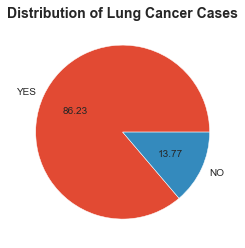

In [62]:
plt.pie(lung_cancer['LUNG_CANCER'].value_counts(), labels=['YES', 'NO'], autopct="%0.2f")
plt.title('Distribution of Lung Cancer Cases', fontsize=14, fontweight='bold')
plt.show()

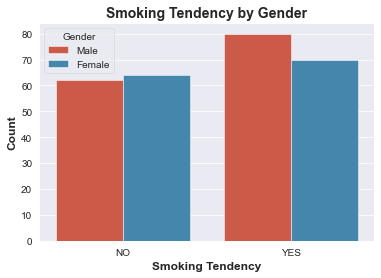

In [63]:
lung_cancer['SMOKING'] = lung_cancer['SMOKING'].map({1: 'NO', 2: 'YES'})
sns.countplot(data=lung_cancer, x="SMOKING", hue="GENDER")
plt.xlabel("Smoking Tendency", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Smoking Tendency by Gender", fontsize=14, fontweight='bold')
plt.legend(title="Gender", labels=["Male", "Female"])

plt.show()

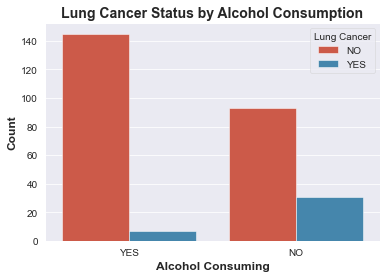

In [64]:
lung_cancer['ALCOHOL CONSUMING'] = lung_cancer['ALCOHOL CONSUMING'].replace({1: 'NO', 2: 'YES'})
sns.countplot(data=lung_cancer, x="ALCOHOL CONSUMING", hue="LUNG_CANCER")
plt.xlabel("Alcohol Consuming", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Lung Cancer Status by Alcohol Consumption", fontsize=14, fontweight='bold')
plt.legend(title="Lung Cancer", labels=["NO", "YES"])

plt.show()

Text(0.5, 1.0, 'Distribution of Age in Lung Cancer Dataset')

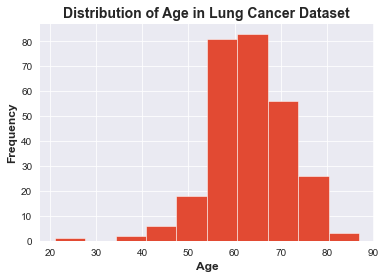

In [65]:
import matplotlib.pyplot as plt
plt.hist(data=lung_cancer, x='AGE')
plt.xlabel("Age", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Age in Lung Cancer Dataset", fontsize=14, fontweight='bold')

## Fetching only the columns with categorical values

In [66]:
category_cols =lung_cancer.select_dtypes(["object"]).head()
category_cols

,GENDER,SMOKING,ALCOHOL CONSUMING,LUNG_CANCER
0,M,NO,YES,YES
1,M,YES,NO,YES
2,F,NO,NO,NO
3,M,YES,YES,NO
4,F,NO,NO,NO


## Changing categorical data

In [19]:
from sklearn.preprocessing import LabelEncoder

### Define label encoder object

In [67]:
lbl_encoder = LabelEncoder()

In [68]:
lung_cancer['GENDER'] = lbl_encoder.fit_transform(lung_cancer['GENDER'])
lung_cancer['SMOKING'] = lbl_encoder.fit_transform(lung_cancer['SMOKING'])
lung_cancer['ALCOHOL CONSUMING'] = lbl_encoder.fit_transform(lung_cancer['ALCOHOL CONSUMING'])
lung_cancer['LUNG_CANCER'] = lbl_encoder.fit_transform(lung_cancer['LUNG_CANCER'])

lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,2,2,1,1,2,1,2,1,2,2,2,2,1
1,1,74,1,1,1,1,2,2,2,1,0,1,2,2,2,1
2,0,59,0,1,1,2,1,2,1,2,0,2,2,1,2,0
3,1,63,1,2,2,1,1,1,1,1,1,1,1,2,2,0
4,0,63,0,2,1,1,1,1,1,2,0,2,2,1,1,0


## Heatmap

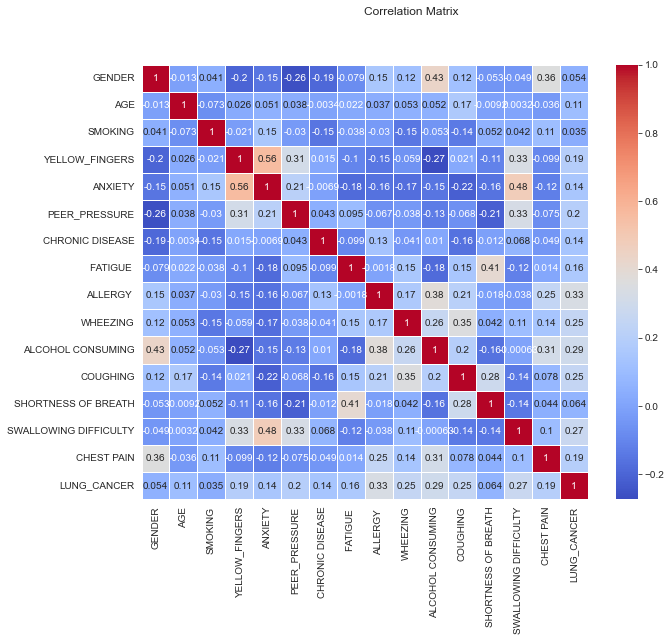

In [22]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.heatmap(data=lung_cancer.corr(),
           annot=True,
           linewidth=0.5,
           cmap="coolwarm")
plt.suptitle("Correlation Matrix")
plt.show()

##  Prediction with logistic regression

## Declaring dependent and independent variable

In [69]:
X = lung_cancer.drop(['LUNG_CANCER'], axis=1)
y = lung_cancer.LUNG_CANCER

In [70]:
X.shape

(276, 15)

In [71]:
y.shape

(276,)

## Model Development

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (220, 15)
X_test shape: (56, 15)
y_train shape: (220,)
y_test shape: (56,)


## Importing and fitting the model on training data

In [76]:
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

C:\Users\anwes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting on testing data

In [77]:
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

## Accuracy

In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 91.07142857142857


## Precision, Recall, and Accuracy

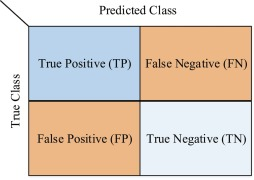

**Precision, recall, and accuracy are commonly used performance metrics in classification tasks.**

**Precision:** Precision measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). It focuses on the quality of positive predictions. A high precision indicates a low rate of false positives.

**Recall:** Recall measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). It focuses on the ability to capture all positive instances. A high recall indicates a low rate of false negatives.

**Accuracy:** Accuracy measures the proportion of correctly predicted instances (both positive and negative) out of the total number of instances. It provides an overall measure of the model's correctness. However, accuracy may not be suitable when there is a class imbalance in the data.

Most frequently, precision and recall are used to measure performance since accuracy alone does not say much about how good or bad a classifier is.

In [78]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



For class 0, the precision is 1.00, which means that when the model predicts class 0, it is correct 100% of the time. The recall is 0.58, indicating that the model identifies 58% of the instances of class 0 correctly. The F1-score, which is a balanced measure of precision and recall, is 0.74.

For class 1, the precision is 0.90, suggesting that when the model predicts class 1, it is correct 90% of the time. The recall is 1.00, indicating that the model correctly identifies 100% of the instances of class 1. The F1-score is 0.95.

The overall accuracy of the model is 0.91, meaning it correctly predicts 91% of the instances in the testing data.

Overall, the model shows relatively high accuracy and precision for class 1 (lung cancer cases) but lower precision and recall for class 0 (non-lung cancer cases). 

## Confusion matrix

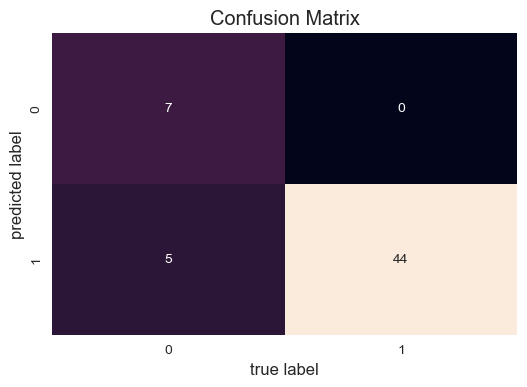

In [79]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## ROC curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

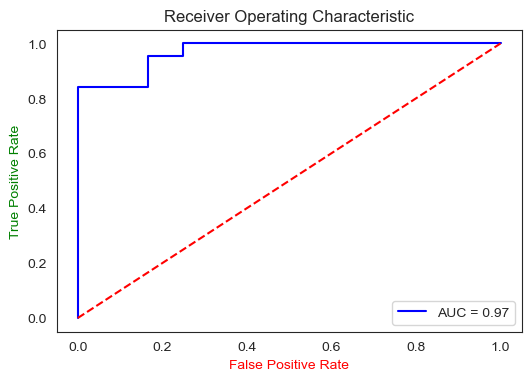

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs =logreg_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.show()

## Conclusion

In conclusion, the logistic regression model showed promising performance in predicting lung cancer cases. It achieved an overall accuracy of 91%, correctly identifying the lung cancer status for the majority of the cases. The model demonstrated high precision for predicting lung cancer cases (class 1) and relatively lower precision for non-lung cancer cases (class 0). The recall for lung cancer cases was excellent, indicating that the model effectively captured the actual positive cases. However, further improvements are needed to enhance the model's ability to accurately predict non-lung cancer cases. Overall, this project provides valuable insights and a foundation for future research and improvements in lung cancer prediction using logistic regression.